<a href="https://colab.research.google.com/github/pauldebayan/ml_notebooks/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Runtime > Change Runtime Type

### Downloading data/file:
` !wget <URL>`

### Uploading data/file:
```
from gooogle.colab import files
uploaded = files.upload()

```

or

```
import google.colab as cb
uploaded = cb.files.upload()

```

> from package_name import module_name.
The import keyword is used to import the entire package, and then you can access its modules using dot notation.

Example:

util.py
```
def my_useful_function():
  printf("Hello World!")
  
```
After uploading util.py we can use it in colab as:
```
from util import my_useful_function
my_useful_function()
```




In [ ]:
!pwd

/content


### Access files from Google Drive:

```
from google.colab import drive
drive.mount('/content/gdrive')

!ls gdrive

```




### Mandatory Skills: NumPy, Scipy, Matplotlib, Pandas and Skikit-Learn

## Machine Learning is nothing but a geometry problem

![Linear_Regression.png](https://raw.githubusercontent.com/pauldebayan/ml_notebooks/main/images/Linear_Regression.png)

## Y is actual value and Y(Hat) is the predicted value

![image.png](https://raw.githubusercontent.com/pauldebayan/ml_notebooks/main/images/LossFunction.jpg)

## Regression Code

Steps:
1. Build the model

```
model = nn.Linear(1, 1)

```

2. Train the model

```
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# Train the model
n_epochs = 30
for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    loss.backward()
    optimizer.step()

```

![TrainTheModel.jpg](https://raw.githubusercontent.com/pauldebayan/ml_notebooks/main/images/TrainTheModel.jpg)


> PyTorch doesn't work with Numpy arrays, but **Torch Tensors**


```
# Array to Tensors

# In ML we want our data to be of shape:
# (num_samples x num_dimensions)

X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

```


3. Make predictions

Since inputs are in tensors it generates output also as tensors

```
# Forward pass
outputs = model(inputs)

# To display the output data we need to convert Tensor to numpy using:

predictions = model(inputs).detach().numpy()
# Detaches from graph(more details later), and convert to Numpy array
```






# Coding

> torch.nn - nn is a module containing lot of useful stuff

Capital **N** for number of samples <br/>
Capital **D** for number of features


`np.random.randn(N) # Gaussian noise`

In [1]:
import torch

import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt

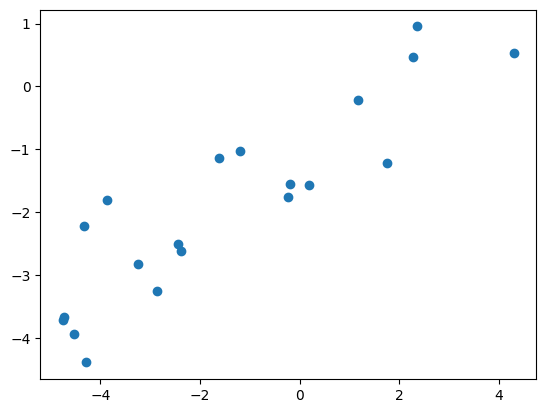

In [2]:
N = 20

X = np.random.random(N)*10 - 5

# Here 0.5 is the m slope and 1 is the b intercept
Y = 0.5 * X - 1 + np.random.randn(N)

plt.scatter(X, Y)

# PyTorch Code

In [4]:
# We are creating a linear regression model with 1 input and 1 output
model = nn.Linear(1, 1)

# Training process starts with defining a loss function(MSE)  object and an optimizer object(SGD)
# Here lr is 'learning rate'

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


# We start by reshaping X and Y into N by 1 matrices
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

type(inputs)


torch.Tensor

In [8]:
# Train the model
# Here 30 is a number choosed after some experimentation
n_epochs = 30
losses = []

for it in range(n_epochs):
    # zero the parameter gradients
    # Behind the scene PyTorch is actually accumulating the gradient each time you call backwards
    # zero the gradient to prevent them from accumulating and give us the correct answer
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Keep the loss so we can plot it later
    # We need to take the loss from PyTorch land to Python land
    # item() because loss is a single number
    losses.append(loss.item())

    # Backward and optimize
    # We calculate the gradients, PyTorch encapsulates this in function called 'backward' to be called from the 'loss' tensor
    loss.backward()

    # Finally we call optimizer.step() to do one step of gradient descent
    optimizer.step()

    print(f"Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}" )

Epoch 1/30, Loss: 0.4872
Epoch 2/30, Loss: 0.4804
Epoch 3/30, Loss: 0.4748
Epoch 4/30, Loss: 0.4703
Epoch 5/30, Loss: 0.4666
Epoch 6/30, Loss: 0.4635
Epoch 7/30, Loss: 0.4611
Epoch 8/30, Loss: 0.4590
Epoch 9/30, Loss: 0.4574
Epoch 10/30, Loss: 0.4560
Epoch 11/30, Loss: 0.4549
Epoch 12/30, Loss: 0.4540
Epoch 13/30, Loss: 0.4533
Epoch 14/30, Loss: 0.4527
Epoch 15/30, Loss: 0.4522
Epoch 16/30, Loss: 0.4518
Epoch 17/30, Loss: 0.4515
Epoch 18/30, Loss: 0.4512
Epoch 19/30, Loss: 0.4510
Epoch 20/30, Loss: 0.4508
Epoch 21/30, Loss: 0.4507
Epoch 22/30, Loss: 0.4505
Epoch 23/30, Loss: 0.4504
Epoch 24/30, Loss: 0.4504
Epoch 25/30, Loss: 0.4503
Epoch 26/30, Loss: 0.4502
Epoch 27/30, Loss: 0.4502
Epoch 28/30, Loss: 0.4502
Epoch 29/30, Loss: 0.4501
Epoch 30/30, Loss: 0.4501


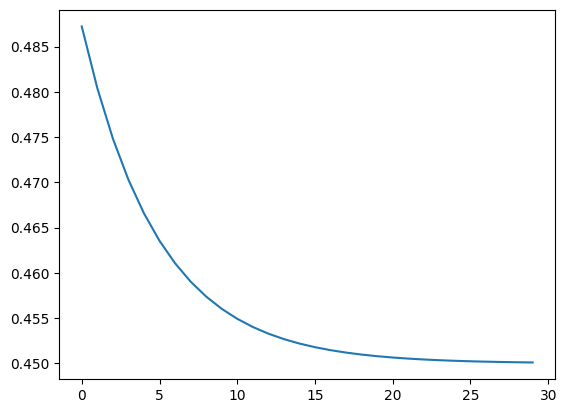

In [9]:
plt.plot(losses)

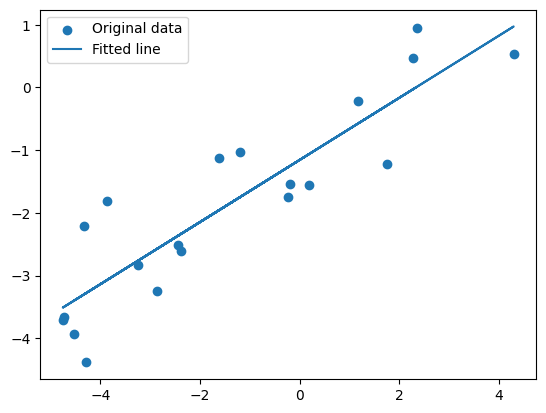

In [14]:
# Plot the graph

predicted = model(inputs).detach().numpy()

plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')

plt.legend()

In [16]:
model(inputs).numpy() # Will create error if we do not call detach function

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [17]:
# Important
# We know true values of weight w and bias b
w = model.weight.data.numpy()
b = model.bias.data.numpy()

print(w, b)

[[0.49580413]] [-1.1552438]
